In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\Dinesh\\Desktop\\DataSets")

In [3]:
data=pd.read_csv('challenger.csv')

In [4]:
data.head()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [5]:
o_ring_failures=data['O.ring.failures']

In [6]:
temp=data['temperature']

In [7]:
pressure=data['pressure']

# Statistical Analysis

In [8]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,temp).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0402
Time:                        10:17:43   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,pressure).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00875
Time:                        10:17:43   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Models with different features

In [12]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

# Model b/w temperature and o_ring_failures with test size 40%

In [14]:
X_train,X_test,y_train,y_test= train_test_split(temp,o_ring_failures,test_size=0.4,random_state=1)

In [15]:
X_train=X_train.values.reshape(-1,1)

In [16]:
temp_model=reg.fit(X_train,y_train)

In [17]:
X_test=X_test.values.reshape((-1,1))

In [18]:
temp_model.score(X_test,y_test)

0.5268468243091089

In [19]:
temp_model.intercept_

3.874282260501663

In [20]:
temp_model.coef_

array([-0.05197945])

In [21]:
predictions=temp_model.predict(X_test)

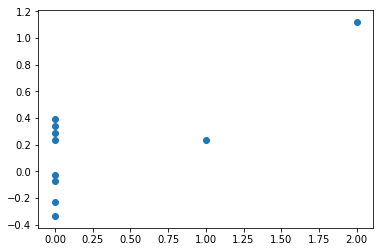

In [22]:
plt.scatter(y_test,predictions)

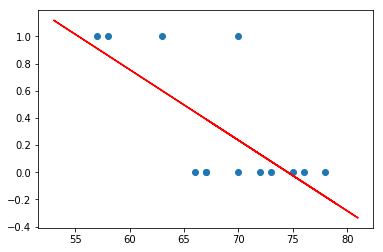

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color="r")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
y_train_prediction = temp_model.predict(X_train)

In [26]:
y_test_prediction = temp_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.3274346152282803

In [28]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.4966925220778349

# Model b/w pressure and o_ring_failures with test size 40%

In [29]:
X_train,X_test,y_train,y_test= train_test_split(pressure,o_ring_failures,test_size=0.4,random_state=1)

In [30]:
X_train=X_train.values.reshape(-1,1)

In [31]:
pressure_model=reg.fit(X_train,y_train)

In [32]:
X_test=X_test.values.reshape((-1,1))

In [33]:
pressure_model.score(X_test,y_test)

0.049977397666294165

In [34]:
pressure_model.intercept_

0.17132867132867144

In [35]:
pressure_model.coef_

array([0.00090909])

In [36]:
predictions=pressure_model.predict(X_test)

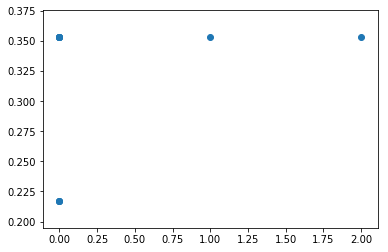

In [37]:
plt.scatter(y_test,predictions)

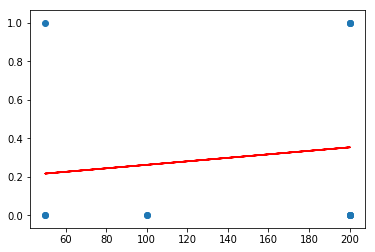

In [38]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color='r')
plt.show()

In [39]:
y_train_prediction = pressure_model.predict(X_train)

In [40]:
y_test_prediction = pressure_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.4577349101639358

In [42]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.016414141414141548

# Model blw temperature and o_ring_failures with test size 30%

In [43]:
X_train,X_test,y_train,y_test= train_test_split(temp,o_ring_failures,test_size=0.3,random_state=1)

In [44]:
X_train=X_train.values.reshape(-1,1)

In [45]:
temp_model1=reg.fit(X_train,y_train)

In [46]:
X_test=X_test.values.reshape((-1,1))

In [47]:
temp_model1.score(X_test,y_test)

0.4978186314339552

In [48]:
temp_model1.intercept_

3.6755319148936163

In [49]:
temp_model1.coef_

array([-0.04964539])

In [50]:
predictions=temp_model1.predict(X_test)

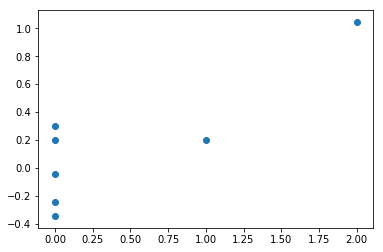

In [51]:
plt.scatter(y_test,predictions)

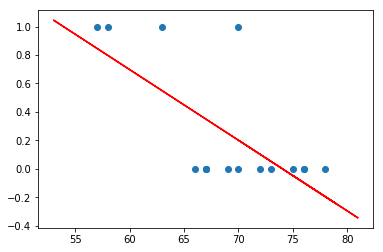

In [52]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color='r')
plt.show()

In [53]:
y_train_prediction = temp_model1.predict(X_train)

In [54]:
y_test_prediction = temp_model1.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.31720745163991104

In [56]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.463356973995272

# Model blw pressure and o_ring_failures with test size 30%

In [57]:
X_train,X_test,y_train,y_test= train_test_split(pressure,o_ring_failures,test_size=0.3,random_state=1)

In [58]:
X_train=X_train.values.reshape(-1,1)

In [59]:
pressure_model1=reg.fit(X_train,y_train)

In [60]:
X_test=X_test.values.reshape((-1,1))

In [61]:
pressure_model1.score(X_test,y_test)

-0.0013764932957578413

In [62]:
pressure_model1.intercept_

0.08829568788501022

In [63]:
pressure_model1.coef_

array([0.0011499])

In [64]:
predictions=pressure_model1.predict(X_test)

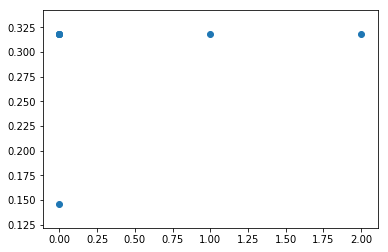

In [65]:
plt.scatter(y_test,predictions)

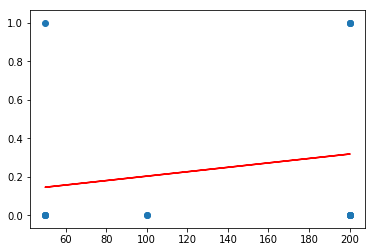

In [66]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color='r')
plt.show()

In [67]:
y_train_prediction = pressure_model1.predict(X_train)

In [68]:
y_test_prediction = pressure_model1.predict(X_test)

In [69]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.42568943958396005

In [70]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.033538672142368164

# Model blw temperature and o_ring_failures with test size 20%

In [71]:
X_train,X_test,y_train,y_test= train_test_split(temp,o_ring_failures,test_size=0.2,random_state=1)

In [72]:
X_train=X_train.values.reshape(-1,1)

In [73]:
temp_model2=reg.fit(X_train,y_train)

In [74]:
X_test=X_test.values.reshape((-1,1))

In [75]:
temp_model2.score(X_test,y_test)

0.6495177558531813

In [76]:
temp_model2.intercept_

3.643754909662214

In [77]:
temp_model2.coef_

array([-0.04870385])

In [78]:
predictions=temp_model2.predict(X_test)

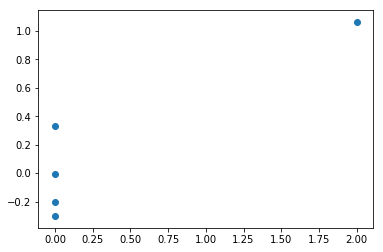

In [79]:
plt.scatter(y_test,predictions)

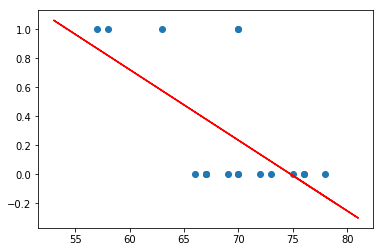

In [80]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color='r')
plt.show()

In [81]:
y_train_prediction = temp_model2.predict(X_train)

In [82]:
y_test_prediction = temp_model2.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.35504690530463157

In [84]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.37164783370596444

# Model blw pressure and o_ring_failures with test size 20%

In [85]:
X_train,X_test,y_train,y_test= train_test_split(pressure,o_ring_failures,test_size=0.2,random_state=1)

In [86]:
X_train=X_train.values.reshape(-1,1)

In [87]:
pressure_model2=reg.fit(X_train,y_train)

In [88]:
X_test=X_test.values.reshape((-1,1))

In [89]:
pressure_model2.score(X_test,y_test)

0.028238207701429707

In [90]:
pressure_model2.intercept_

0.07419898819561552

In [91]:
pressure_model2.coef_

array([0.0013828])

In [92]:
predictions=pressure_model2.predict(X_test)

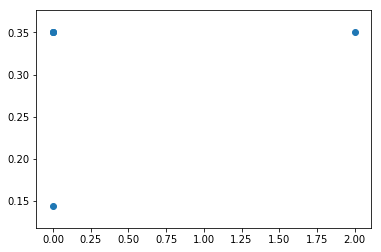

In [93]:
plt.scatter(y_test,predictions)

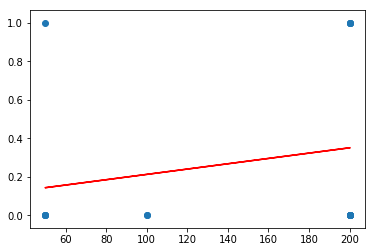

In [94]:
plt.scatter(X_train,y_train)
plt.plot(X_test,predictions,color="r")
plt.show()

In [95]:
y_train_prediction = pressure_model2.predict(X_train)

In [96]:
y_test_prediction = pressure_model2.predict(X_test)

In [97]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

0.438027499921697

In [98]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.043611363341548914


#  MultiLinear Model

In [99]:
x=data[['temperature','pressure']]
y=data['O.ring.failures']

In [107]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [108]:
multi_model=reg.fit(X_train,y_train)

In [109]:
multi_model.score(X_test,y_test)

0.7206114496211502

In [118]:
from sklearn.metrics import mean_squared_error,r2_score

In [119]:
multi_model.coef_

array([-0.04816818,  0.00123984])

In [120]:
multi_model.intercept_

3.4242022705296695

In [122]:
test_predictions=multi_model.predict(X_test)

In [123]:
train_predictions = multi_model.predict(X_train)

In [126]:
np.sqrt(mean_squared_error(y_test,test_predictions))

0.42285774468781323

In [127]:
np.sqrt(mean_squared_error(y_train,train_predictions))

0.3450125966670802

In [128]:
r2_score(y_test,test_predictions)

0.7206114496211502

In [129]:
r2_score(y_train,train_predictions)

0.4066628282722544